In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Step 1: Data Preparation


In [39]:
# Step 1: Read the data from NVDA.csv
data = pd.read_csv('NVDA.csv')

data.drop(['open', 'high', 'low', 'volume', 'pct_change'], axis=1, inplace=True)

# Ensure the 'Timestamp' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Step 3: Filter the data to include only years 2020 onward
data = data[data['date'] >= '2020-01-01']

# Step 2: Set the index to 'Timestamp' and drop the original 'Timestamp' column
data.set_index('date', drop=True, inplace=True)

data.head()

,close
date,
2020-01-02,59.9775
2020-01-03,59.0175
2020-01-06,59.2650
2020-01-07,59.9825
2020-01-08,60.0950


### Step 2: Decompose the Time Series

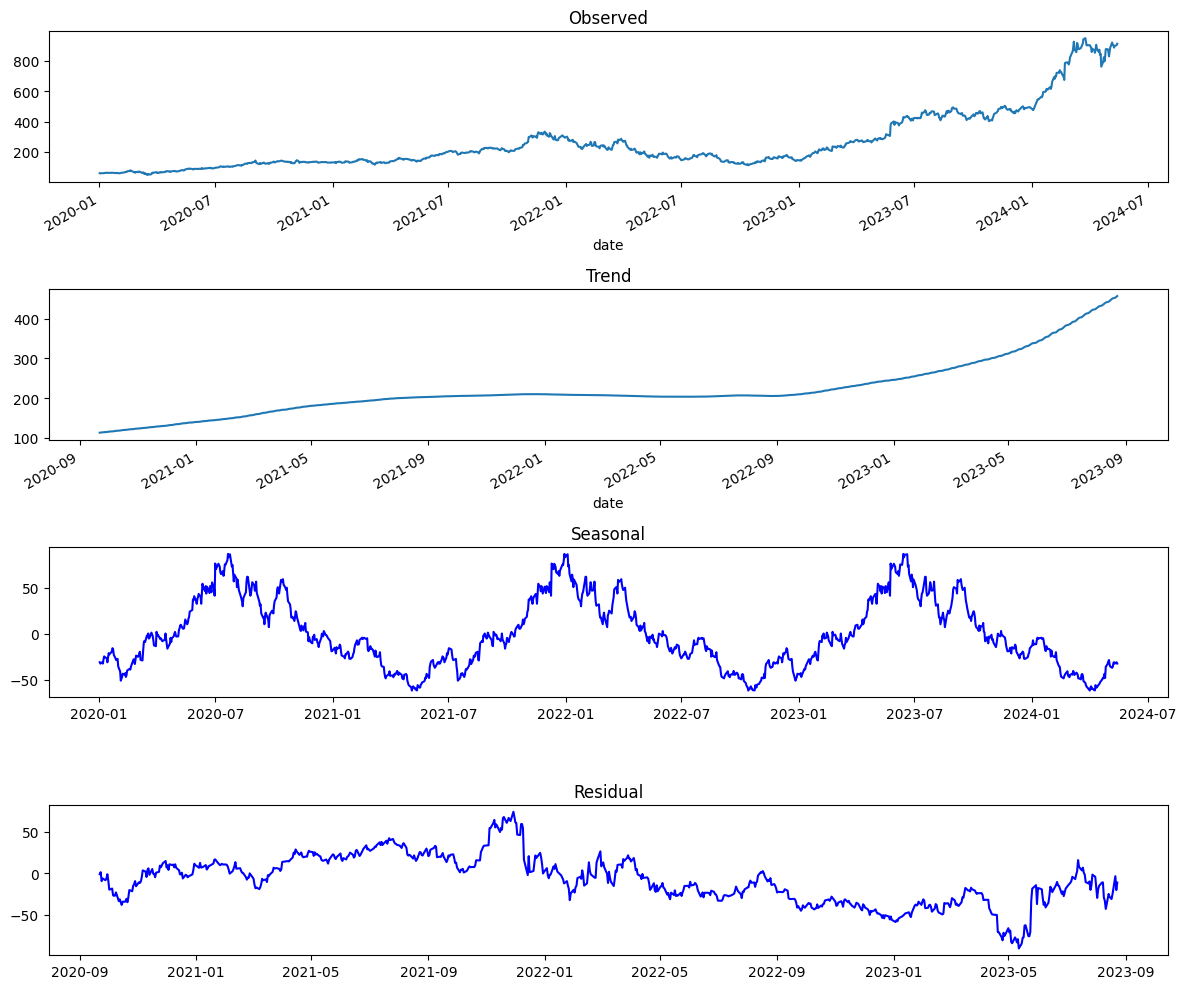

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the NVDA time series with a yearly seasonality period (365 days)
decomposition = seasonal_decompose(data['close'], model='additive', period=365)

# Plot the decomposition manually
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')

# Manually plot the seasonal component without fill
ax3.plot(decomposition.seasonal.index, decomposition.seasonal, color='b')
ax3.set_title('Seasonal')
ax3.set_xlabel('')

# Manually plot the residual component without fill
ax4.plot(decomposition.resid.index, decomposition.resid, color='b')
ax4.set_title('Residual')
ax4.set_xlabel('')

plt.tight_layout()
plt.show()


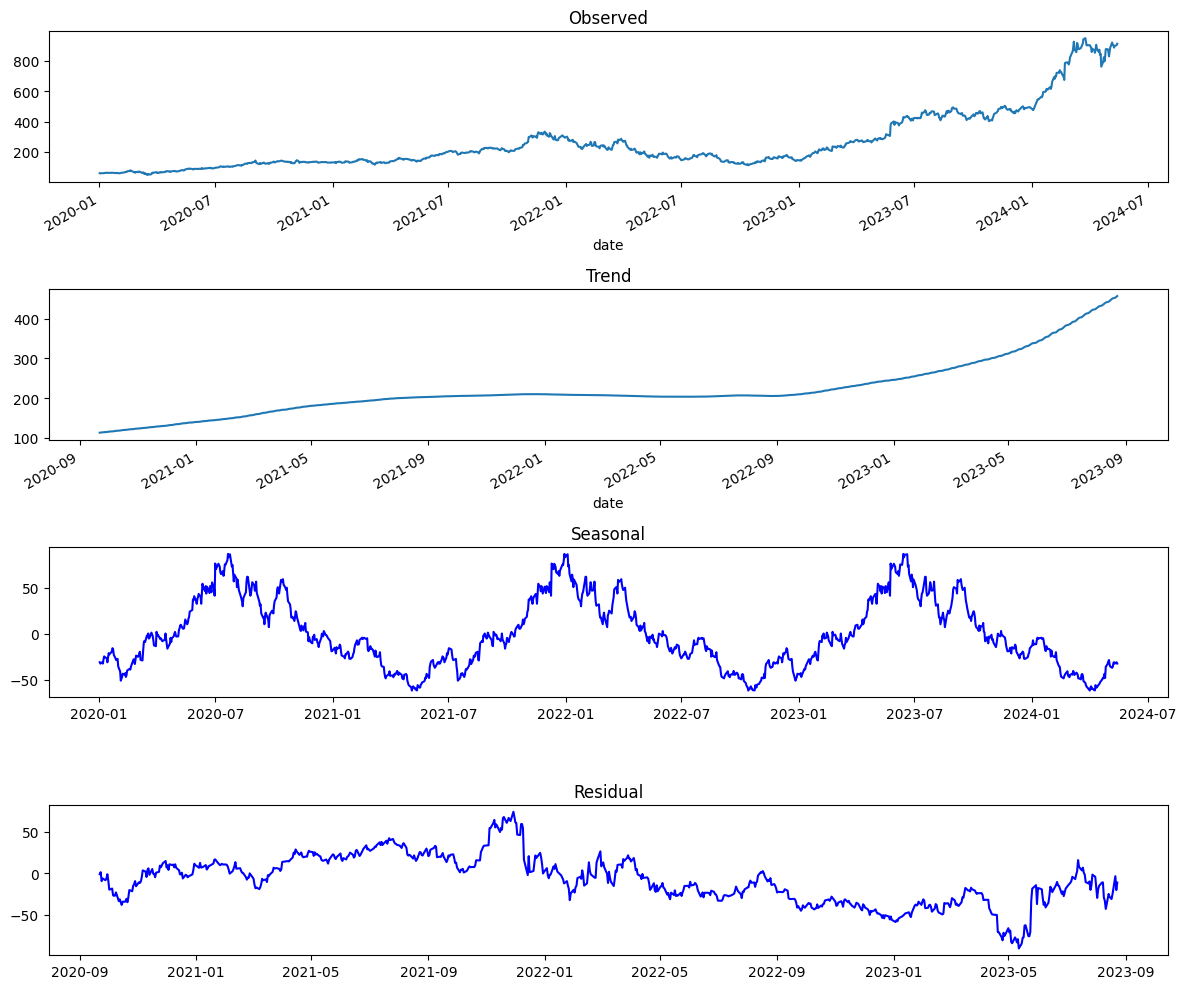

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2024-05-15    919.191775
2024-05-16    924.085461
2024-05-17    926.300682
2024-05-18    928.984038
2024-05-19    928.347538
2024-05-20    934.225114
2024-05-21    940.479043
2024-05-22    942.195940
2024-05-23    946.908652
2024-05-24    952.142968
2024-05-25    954.131233
2024-05-26    952.808569
2024-05-27    951.479469
2024-05-28    953.930438
2024-05-29    957.078587
2024-05-30    960.014015
2024-05-31    956.394297
2024-06-01    955.750763
2024-06-02    952.429621
2024-06-03    956.930929
2024-06-04    960.973984
2024-06-05    965.822863
2024-06-06    968.744193
2024-06-07    972.837988
2024-06-08    973.095009
2024-06-09    977.014043
2024-06-10    984.543247
2024-06-11    988.976314
2024-06-12    992.699339
2024-06-13    997.162092
Freq: D, dtype: float64


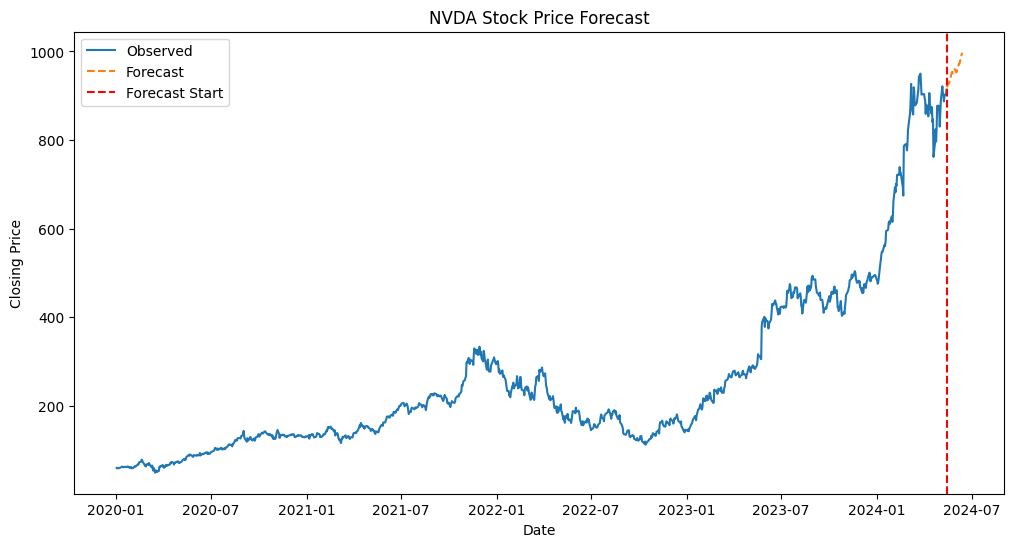

In [50]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Read the data from NVDA.csv
data = pd.read_csv('NVDA.csv')

# Drop unnecessary columns
data.drop(['open', 'high', 'low', 'volume', 'pct_change'], axis=1, inplace=True)

# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Step 3: Filter the data to include only years 2020 onward
data = data[data['date'] >= '2020-01-01']

# Step 4: Set the index to 'date' and drop the original 'date' column
data.set_index('date', drop=True, inplace=True)

# Decompose the NVDA time series with a yearly seasonality period (365 days)
decomposition = sm.tsa.seasonal_decompose(data['close'], model='additive', period=365)

# Plot the decomposition manually
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')

# Manually plot the seasonal component without fill
ax3.plot(decomposition.seasonal.index, decomposition.seasonal, color='b')
ax3.set_title('Seasonal')
ax3.set_xlabel('')

# Manually plot the residual component without fill
ax4.plot(decomposition.resid.index, decomposition.resid, color='b')
ax4.set_title('Residual')
ax4.set_xlabel('')

plt.tight_layout()
plt.show()

# Fit the model with daily seasonality (365 days period)
model = ExponentialSmoothing(data['close'], trend='add', seasonal='add', seasonal_periods=365)
fit = model.fit()

# Forecast for the next 30 days
forecast = fit.forecast(steps=30)

# Combine the observed data and forecast data for plotting
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_index)

# Debug: Print the forecast_series to ensure it aligns correctly
print(forecast_series)

# Plot the observed data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['close'], label='Observed')
plt.plot(forecast_series, label='Forecast', linestyle='--')
plt.axvline(x=data.index[-1], color='r', linestyle='--', label='Forecast Start')
plt.title('NVDA Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.savefig('nvda_forecast.png')
plt.show()



In [55]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 1: Read the data from NVDA.csv
data = pd.read_csv('NVDA.csv')

# Drop unnecessary columns
data.drop(['open', 'high', 'low', 'volume', 'pct_change'], axis=1, inplace=True)

# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Step 3: Filter the data to include only years 2020 onward
data = data[data['date'] >= '2020-01-01']

# Step 4: Set the index to 'date' and drop the original 'date' column
data.set_index('date', drop=True, inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


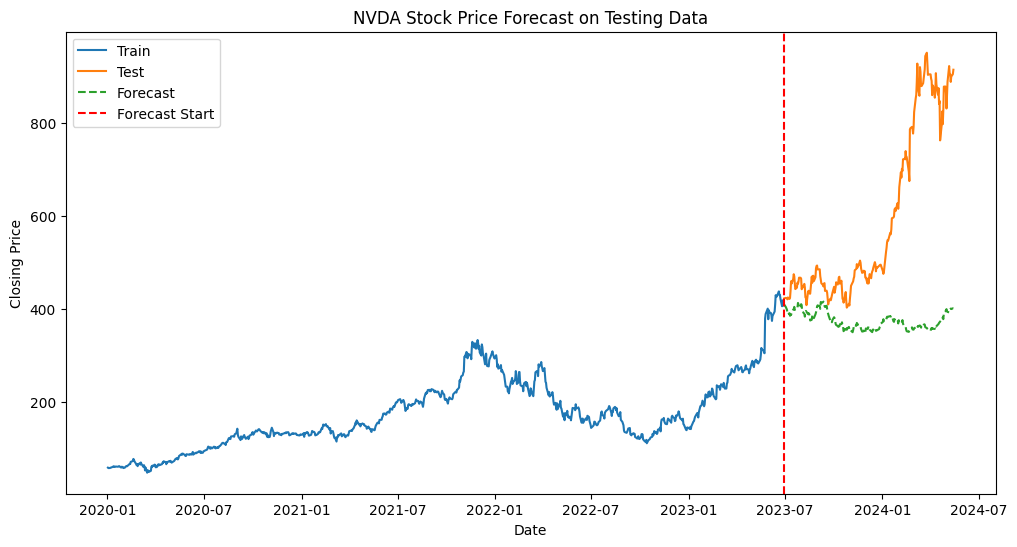

In [56]:
# Fit the model on the training data
model = ExponentialSmoothing(train['close'], trend='add', seasonal='add', seasonal_periods=365)
fit = model.fit()

# Forecast on the testing data
test_forecast = fit.forecast(steps=len(test))

# Ensure the forecast aligns with the test index
test_forecast.index = test.index

# Combine the observed and forecast data for plotting
combined = pd.concat([train['close'], test['close'], test_forecast], axis=1)
combined.columns = ['Train', 'Test', 'Forecast']

# Plot the observed and forecast data
plt.figure(figsize=(12, 6))
plt.plot(combined['Train'], label='Train')
plt.plot(combined['Test'], label='Test')
plt.plot(combined['Forecast'], label='Forecast', linestyle='--')
plt.axvline(x=train.index[-1], color='r', linestyle='--', label='Forecast Start')
plt.title('NVDA Stock Price Forecast on Testing Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


NaN values in residuals: 0


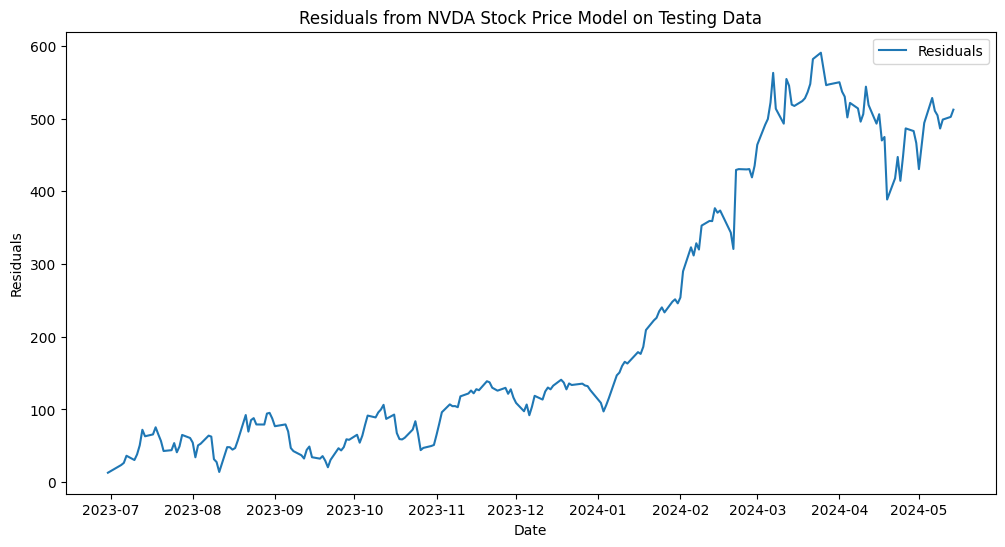

Residual Mean: 214.62902110944293
Residual Std Dev: 186.47500478132366
Mean Squared Error (MSE): 80680.48534964604
Mean Absolute Error (MAE): 214.62902110944293


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is depreca

In [58]:
# Calculate residuals on the testing data
residuals = test['close'] - test_forecast

# Check for NaN values
print("NaN values in residuals:", residuals.isna().sum())

# Drop NaN values from residuals if any
residuals = residuals.dropna()

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals from NVDA Stock Price Model on Testing Data')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

plt.savefig('residuals.png')
plt.show()

# Calculate summary statistics for residuals
residual_mean = residuals.mean()
residual_std = residuals.std()
print(f'Residual Mean: {residual_mean}')
print(f'Residual Std Dev: {residual_std}')

# Calculate forecast accuracy metrics
mse = mean_squared_error(test['close'], test_forecast)
mae = mean_absolute_error(test['close'], test_forecast)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
